In [1]:
!pip install replicate
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
from google.colab import userdata
import os

#ambil api_token dari secret
api_token = userdata.get("api_token")

#lempar api_token kke env. var.
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
from langchain_community.llms import Replicate

llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

**Data Processing (pembersihan)**

In [8]:
import pandas as pd

# Baca CSV
df = pd.read_csv('/content/sample_data/online_sales_data.csv')

# Cek struktur
print(df.info())
print(df.head())

# Cek missing values
print(df.isnull().sum())

# Hapus duplikat
df = df.drop_duplicates()

# Isi missing values (contoh: isi Total_Sales dengan median)
df['Total_Sales'] = df['Total_Sales'].fillna(df['Total_Sales'].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          100 non-null    int64 
 1   Customer_Age      100 non-null    int64 
 2   Gender            100 non-null    object
 3   Product_Category  100 non-null    object
 4   Quantity          100 non-null    int64 
 5   Price_per_Item    100 non-null    int64 
 6   Payment_Method    100 non-null    object
 7   Region            100 non-null    object
 8   Order_Date        100 non-null    object
 9   Total_Sales       100 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 7.9+ KB
None
   Order_ID  Customer_Age  Gender Product_Category  Quantity  Price_per_Item  \
0         1            56    Male           Sports         4          872209   
1         2            46  Female          Fashion         1          106958   
2         3            32  Female           Beaut

Data Transformation

In [6]:
# Ubah Order_Date ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Buat kolom tambahan
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

# One-hot encoding untuk kategorikal
df = pd.get_dummies(df, columns=['Gender', 'Product_Category', 'Payment_Method', 'Region'], drop_first=True)


In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.4 MB/s eta 0:00:00


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ['Customer_Age', 'Quantity', 'Price_per_Item', 'Total_Sales']
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())


   Customer_Age  Quantity  Price_per_Item  Total_Sales
0      0.926829       1.0        0.865418     1.000000
1      0.682927       0.0        0.056951     0.007610
2      0.341463       0.0        0.083486     0.014980
3      0.170732       1.0        0.562008     0.662902
4      0.487805       0.0        0.794491     0.212467


**Data Normalization**

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ['Customer_Age', 'Quantity', 'Price_per_Item', 'Total_Sales']
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())


   Customer_Age  Quantity  Price_per_Item  Total_Sales
0      0.926829       1.0        0.865418     1.000000
1      0.682927       0.0        0.056951     0.007610
2      0.341463       0.0        0.083486     0.014980
3      0.170732       1.0        0.562008     0.662902
4      0.487805       0.0        0.794491     0.212467


**Exploratory Data Analysis (EDA)**

         Order_ID  Customer_Age    Quantity  Price_per_Item  \
count  100.000000    100.000000  100.000000      100.000000   
mean    50.500000      0.485610    0.520000        0.442956   
min      1.000000      0.000000    0.000000        0.000000   
25%     25.750000      0.213415    0.000000        0.195473   
50%     50.500000      0.487805    0.666667        0.412693   
75%     75.250000      0.689024    1.000000        0.687542   
max    100.000000      1.000000    1.000000        1.000000   
std     29.011492      0.298035    0.397297        0.290937   

                Order_Date  Total_Sales  Order_Month  Order_Year  
count                  100   100.000000   100.000000       100.0  
mean   2024-02-19 12:00:00     0.325223     2.180000      2024.0  
min    2024-01-01 00:00:00     0.000000     1.000000      2024.0  
25%    2024-01-25 18:00:00     0.121238     1.000000      2024.0  
50%    2024-02-19 12:00:00     0.242905     2.000000      2024.0  
75%    2024-03-15 06:00:00    

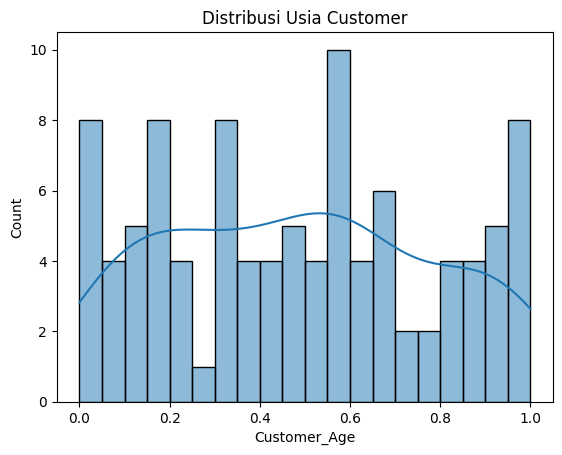

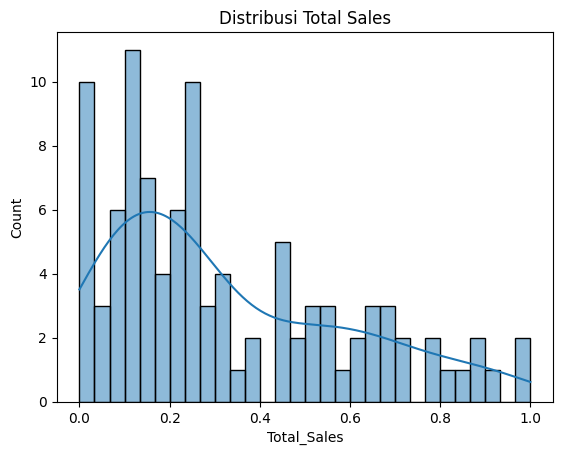

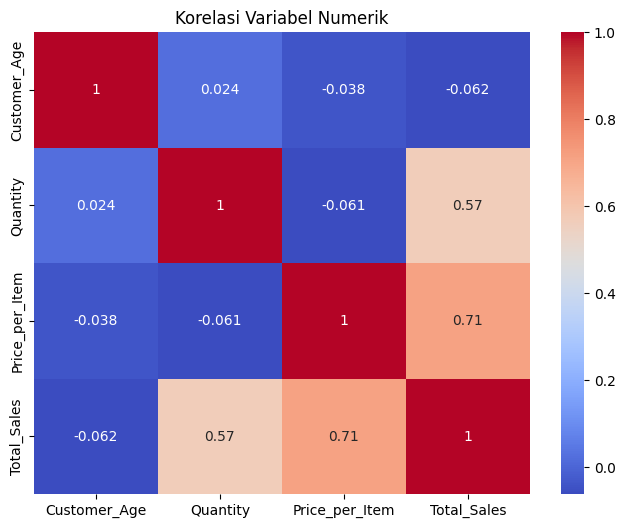

  Order_Date  Order_Month  Order_Year
0 2024-01-01            1        2024
1 2024-01-02            1        2024
2 2024-01-03            1        2024
3 2024-01-04            1        2024
4 2024-01-05            1        2024


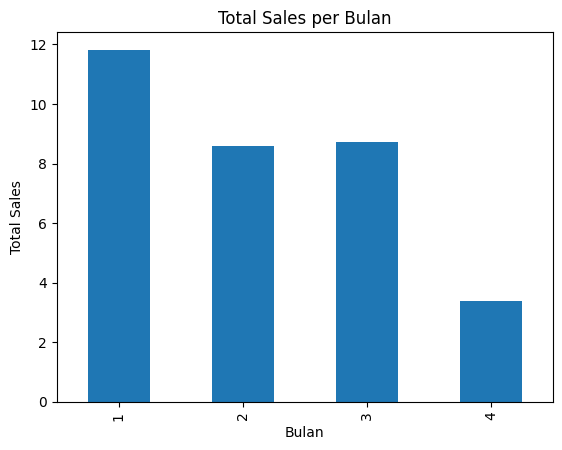

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(df.describe())

# Distribusi umur customer
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title("Distribusi Usia Customer")
plt.show()

# Distribusi Total Sales
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title("Distribusi Total Sales")
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Variabel Numerik")
plt.show()

# Pastikan Order_Date sudah dalam format datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Buat kolom bulan dan tahun
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

# Cek apakah sudah ada kolomnya
print(df[['Order_Date', 'Order_Month', 'Order_Year']].head())

# Total Sales per bulan
df.groupby('Order_Month')['Total_Sales'].sum().plot(kind='bar')
plt.title("Total Sales per Bulan")
plt.ylabel("Total Sales")
plt.xlabel("Bulan")
plt.show()


